# Toy Problem #1


In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np

Read the edges and nodes

In [3]:
edgelist = pd.read_csv("edges.csv")
nodelist = pd.read_csv("nodes.csv")

Create graph

In [4]:
G = nx.Graph()
for i,edges in edgelist.iterrows():
    G.add_edge(edges.iloc[0],edges.iloc[1],**edges.iloc[2:].to_dict())

for i,nodes in nodelist.iterrows():
    nx.set_node_attributes(G, {nodes['id']:  nodes[1:].to_dict()})  


Take a step back and visualize the data in our graph

In [5]:
print('# of edges: {}'.format(G.number_of_edges()))
print('# of nodes: {}'.format(G.number_of_nodes()))

print(G.edges(data=True))
print(G.nodes(data=True))

# of edges: 6
# of nodes: 5
[('depot', 'home', {'distance': 1, 'priority': 1, 'time': 1, 'original': 1}), ('depot', 'school', {'distance': 2, 'priority': 1, 'time': 2, 'original': 1}), ('depot', 'grocery', {'distance': 7, 'priority': 2, 'time': 7, 'original': 1}), ('school', 'grocery', {'distance': 5, 'priority': 2, 'time': 5, 'original': 1}), ('school', 'hospital', {'distance': 3, 'priority': 3, 'time': 3, 'original': 1}), ('grocery', 'hospital', {'distance': 3, 'priority': 3, 'time': 3, 'original': 1})]
[('depot', {'x': 0, 'y': 0}), ('home', {'x': 1, 'y': 0}), ('school', {'x': 0, 'y': 2}), ('grocery', {'x': 5, 'y': 2}), ('hospital', {'x': 3, 'y': 7})]


##### Visualize the Graph

In [6]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['x'], node[1]['y']) for node in G.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
dict(list(node_positions.items())[0:5])


{'depot': (0, 0),
 'home': (1, 0),
 'school': (0, 2),
 'grocery': (5, 2),
 'hospital': (3, 7)}

Now plot

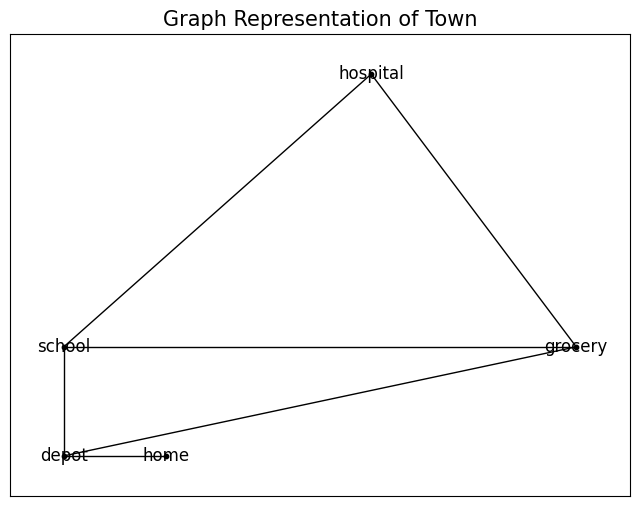

In [7]:
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos=node_positions, node_size=10, node_color='black', with_labels=True)
plt.title('Graph Representation of Town', size=15)
plt.show()